***SI 330 FINAL PROJECT: FIFA 22 CAREER MODE PLAYER VALUATIONS vs. REAL LIFE TRANSFER MARKET VALUATIONS***

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [223]:
real_life = pd.read_csv('https://query.data.world/s/dorztpe2gbpyecf5ypzuetsuthbf2b') #THIS IS WHERE STUFF GOT CHANGED- URL - https://data.world/dcereijo/player-scores

In [224]:
real_life.head(1)

,player_id,last_season,current_club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
0,38790,2012,28095,dmitri-golubov,Dmitri Golubov,UdSSR,Russia,1985-06-24,Attack,attack - Centre-Forward,Both,178,NaN,NaN,https://www.transfermarkt.co.uk/dmitri-golubov...


***PLEASE DON'T SKIP THIS- IT IS REALLY IMPORTANT AND I PROMISE I AM NOT A FRAUD***

***ALL PREVIOUS CODE FROM THE SCRAPED TABLE HAS BEEN CHANGED AT THE SOURCE MEANING THIS CODE WILL NO LONGER LOAD REAL LIFE VALUES PROPERLY, I HAVE A SAVED CSV OF MY FINAL DATASET WITH PROPERLY FORMATTED VALUES THAT I WILL USE FOR MY FINAL REGRESSION, THE CODE HERE WORKED TO CREATE THAT SET- PROVEN IN THE EXISTING TABLEAU WORKBOOK AND MATCHING DATA IN THE CSV I CREATED***

In [225]:
high_low_rl = real_life.sort_values('market_value_in_gbp', ascending = False)

In [226]:
cleaned_rl = high_low_rl.drop(columns = "current_club_id",)

In [227]:
cleaned_rl.head(5)

,player_id,last_season,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
16090,502670,2019,khvicha-kvaratskhelia,Khvicha Kvaratskhelia,Georgia,Georgia,2001-02-12,Attack,Left Winger,Both,183,14400000.0,16200000.0,https://www.transfermarkt.co.uk/khvicha-kvarat...
15986,668265,2019,kayky,Kayky,Brazil,Brazil,2003-06-11,Attack,Right Winger,Left,175,12600000.0,12600000.0,https://www.transfermarkt.co.uk/kayky/profil/s...
16088,308552,2019,jordan-larsson,Jordan Larsson,Netherlands,Sweden,1997-06-20,Attack,Centre-Forward,Left,175,9900000.0,13500000.0,https://www.transfermarkt.co.uk/jordan-larsson...
15961,86792,2019,xherdan-shaqiri,Xherdan Shaqiri,Jugoslawien (SFR),Switzerland,1991-10-10,Attack,Right Winger,Left,169,7200000.0,22500000.0,https://www.transfermarkt.co.uk/xherdan-shaqir...
16002,149577,2019,pablo,Pablo,Brazil,Brazil,1991-06-21,Defender,Centre-Back,Right,188,7200000.0,9000000.0,https://www.transfermarkt.co.uk/pablo/profil/s...


Basic Searches for Names to Match (Excel)

In [228]:
# write_out.loc[write_out['name'] == 'name-looking-for']

cleaned_rl.loc[cleaned_rl['name'] == 'alex-remiro']

,player_id,last_season,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
18949,212862,2019,alex-remiro,Alex Remiro,Spain,Spain,1995-03-24,Goalkeeper,Goalkeeper,Right,191,NaN,NaN,https://www.transfermarkt.co.uk/alex-remiro/pr...


In [229]:
cleaned_rl.loc[cleaned_rl['date_of_birth'] == '1988-04-30']

,player_id,last_season,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
5255,57693,2014,mario-fernandez,Mario Fernandez,Spain,Spain,1988-04-30,Goalkeeper,Goalkeeper,Right,185,NaN,NaN,https://www.transfermarkt.co.uk/mario-fernande...


Specific Searches for Names to Match (Excel)

In [230]:
mask = cleaned_rl['name'].str.contains('campana', case=False, na=False)
cleaned_rl[mask]

,player_id,last_season,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
12550,606872,2018,leonardo-campana,Leonardo Campana,Ecuador,Ecuador,2000-07-24,Attack,attack - Centre-Forward,Left,188,NaN,NaN,https://www.transfermarkt.co.uk/leonardo-campa...
17246,120095,2019,jose-campana,Jose Campana,Spain,Spain,1993-05-31,Midfield,midfield - Central Midfield,Right,179,NaN,NaN,https://www.transfermarkt.co.uk/jose-campana/p...


In [231]:
fifa = pd.read_csv('FIFA_BETTER_FULL.csv', low_memory = False)

In [232]:
fifa = fifa[['player_url', 'short_name', 'long_name', 'matching_name', 'player_positions', 'overall', 
             'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_name', 'league_name', 'nationality_name']]
                     

In [233]:
hl_fifa = fifa.sort_values('value_eur', ascending = False)

In [234]:
hl_fifa.head(1)

,player_url,short_name,long_name,matching_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_name,league_name,nationality_name
0,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,kylian-mbappe,"ST, LW",91,95,194000000,230000,22,1998-12-20,182,73,Paris Saint-Germain,French Ligue 1,France


In [235]:
cleaned_fifa_hl = hl_fifa.drop(columns = ["short_name", "long_name", "player_positions", "height_cm", "nationality_name", "wage_eur"], axis=1)

In [236]:
cleaned_fifa_hl['fifa_value_usd'] = cleaned_fifa_hl['value_eur'] * 1.10

In [237]:
cleaned_fifa_hl.head(5)

,player_url,matching_name,overall,potential,value_eur,age,dob,weight_kg,club_name,league_name,fifa_value_usd
0,https://sofifa.com/player/231747/kylian-mbappe...,kylian-mbappe,91,95,194000000,22,1998-12-20,73,Paris Saint-Germain,French Ligue 1,213400000.0
1,https://sofifa.com/player/239085/erling-haalan...,erling-haaland,88,93,137500000,20,2000-07-21,94,Borussia Dortmund,German 1. Bundesliga,151250000.0
2,https://sofifa.com/player/202126/harry-kane/22...,harry-kane,90,90,129500000,27,1993-07-28,89,Tottenham Hotspur,English Premier League,142450000.0
3,https://sofifa.com/player/190871/neymar-da-sil...,neymar,91,91,129000000,29,1992-02-05,68,Paris Saint-Germain,French Ligue 1,141900000.0
4,https://sofifa.com/player/192985/kevin-de-bruy...,kevin-de-bruyne,91,91,125500000,30,1991-06-28,70,Manchester City,English Premier League,138050000.0


In [238]:
final_fifa = cleaned_fifa_hl.rename(columns={"matching_name": "name"})
final_fifa.head(1)

,player_url,name,overall,potential,value_eur,age,dob,weight_kg,club_name,league_name,fifa_value_usd
0,https://sofifa.com/player/231747/kylian-mbappe...,kylian-mbappe,91,95,194000000,22,1998-12-20,73,Paris Saint-Germain,French Ligue 1,213400000.0


In [239]:
final_rl = cleaned_rl.drop(columns = ['date_of_birth', 'highest_market_value_in_gbp'], axis = 1)

In [240]:
final_rl['real_life_value_usd'] = final_rl['market_value_in_gbp'] * 1.32

In [241]:
final_rl.head(1)

,player_id,last_season,name,pretty_name,country_of_birth,country_of_citizenship,position,sub_position,foot,height_in_cm,market_value_in_gbp,url,real_life_value_usd
16090,502670,2019,khvicha-kvaratskhelia,Khvicha Kvaratskhelia,Georgia,Georgia,Attack,Left Winger,Both,183,14400000.0,https://www.transfermarkt.co.uk/khvicha-kvarat...,19008000.0


In [242]:
combined = final_rl.merge(final_fifa, on='name')

In [243]:
combined.head(5)

,player_id,last_season,name,pretty_name,country_of_birth,country_of_citizenship,position,sub_position,foot,height_in_cm,...,player_url,overall,potential,value_eur,age,dob,weight_kg,club_name,league_name,fifa_value_usd
0,29035,2012,ederson,Ederson,Brazil,Brazil,Attack,midfield - Attacking Midfield,Right,181,...,https://sofifa.com/player/210257/ederson-santa...,89,91,94000000,27,1993-08-17,86,Manchester City,English Premier League,103400000.0
1,238223,2019,ederson,Ederson,Brazil,Brazil,Goalkeeper,Goalkeeper,Left,188,...,https://sofifa.com/player/210257/ederson-santa...,89,91,94000000,27,1993-08-17,86,Manchester City,English Premier League,103400000.0
2,607854,2019,ederson,Ederson,Brazil,Brazil,Midfield,midfield - Central Midfield,Right,183,...,https://sofifa.com/player/210257/ederson-santa...,89,91,94000000,27,1993-08-17,86,Manchester City,English Premier League,103400000.0
3,37623,2012,thiago,Thiago,Brazil,Brazil,Attack,attack - Centre-Forward,Right,171,...,https://sofifa.com/player/189509/thiago-alcant...,86,86,65000000,30,1991-04-11,70,Liverpool,English Premier League,71500000.0
4,376175,2018,thiago,Thiago,Brazil,Brazil,Attack,attack - Centre-Forward,Left,184,...,https://sofifa.com/player/189509/thiago-alcant...,86,86,65000000,30,1991-04-11,70,Liverpool,English Premier League,71500000.0


In [244]:
combined.columns

Index(['player_id', 'last_season', 'name', 'pretty_name', 'country_of_birth',
       'country_of_citizenship', 'position', 'sub_position', 'foot',
       'height_in_cm', 'market_value_in_gbp', 'url', 'real_life_value_usd',
       'player_url', 'overall', 'potential', 'value_eur', 'age', 'dob',
       'weight_kg', 'club_name', 'league_name', 'fifa_value_usd'],
      dtype='object')

Find Duplicates or Mis-copies from the Merge

In [245]:
combined['last_season'].value_counts()

2019    337
2014      6
2016      6
2018      4
2012      3
2015      3
2017      1
Name: last_season, dtype: int64

In [246]:
#Use the below to find imposters from each of the above years
combined.loc[combined['last_season'] == 2016]

,player_id,last_season,name,pretty_name,country_of_birth,country_of_citizenship,position,sub_position,foot,height_in_cm,...,player_url,overall,potential,value_eur,age,dob,weight_kg,club_name,league_name,fifa_value_usd
19,277111,2016,jorginho,Jorginho,Guinea-Bissau,Guinea-Bissau,Attack,attack - Left Winger,Right,171,...,https://sofifa.com/player/205498/luiz-frello-f...,85,85,52500000,29,1991-12-20,68,Chelsea,English Premier League,57750000.0
23,517518,2016,arthur,Arthur,Brazil,Brazil,Defender,Defender - Centre-Back,Right,190,...,https://sofifa.com/player/230658/arthur-henriq...,83,85,47000000,24,1996-08-12,73,Juventus,Italian Serie A,51700000.0
25,68815,2016,felipe,Felipe,Brazil,Brazil,Defender,Defender - Centre-Back,Left,193,...,https://sofifa.com/player/207863/felipe-august...,84,84,27500000,32,1989-05-16,84,Atlético de Madrid,Spain Primera Division,30250000.0
26,527192,2016,felipe,Felipe,NaN,Brazil,Defender,Defender - Left-Back,Left,177,...,https://sofifa.com/player/207863/felipe-august...,84,84,27500000,32,1989-05-16,84,Atlético de Madrid,Spain Primera Division,30250000.0
29,385271,2016,allan,Allan,Brazil,Brazil,Midfield,midfield - Defensive Midfield,Left,172,...,https://sofifa.com/player/199914/allan-marques...,83,83,30500000,30,1991-01-08,74,Everton,English Premier League,33550000.0
31,430121,2016,everton,Everton,Brazil,Brazil,Attack,attack - Centre-Forward,Right,186,...,https://sofifa.com/player/222716/everton-sousa...,80,83,28000000,25,1996-03-22,72,SL Benfica,Portuguese Liga ZON SAGRES,30800000.0


In [247]:
combined.loc[combined['name'] == 'leandro']

,player_id,last_season,name,pretty_name,country_of_birth,country_of_citizenship,position,sub_position,foot,height_in_cm,...,player_url,overall,potential,value_eur,age,dob,weight_kg,club_name,league_name,fifa_value_usd
11,42622,2014,leandro,Leandro,Brazil,Brazil,Defender,Defender - Right-Back,Both,181,...,https://sofifa.com/player/207439/leandro-pared...,81,83,28000000,27,1994-06-29,75,Paris Saint-Germain,French Ligue 1,30800000.0


Player IDs to drop:

607854, 29035, 527192, 17127, 68815, 277111, 512356, 245585, 376175, 37623, 312314, 517518, 385271, 430121, 661284, 292749, 58436, 120192, 57693, 42622

In [248]:
combined_clean_p1 = combined.drop(columns = ['url', 'player_url', 'weight_kg', 'height_in_cm', 'country_of_birth', 'last_season', 'market_value_in_gbp', 'value_eur', 'name'], axis=1)

drop_list = [607854, 29035, 527192, 17127, 68815, 277111, 512356, 245585, 376175, 37623, 312314, 517518, 385271, 430121, 661284, 292749, 58436, 120192, 57693, 42622]

In [249]:
combined_clean_p1

combined_clean_p1.loc[combined_clean_p1['player_id'] == 607854]

,player_id,pretty_name,country_of_citizenship,position,sub_position,foot,real_life_value_usd,overall,potential,age,dob,club_name,league_name,fifa_value_usd
2,607854,Ederson,Brazil,Midfield,midfield - Central Midfield,Right,NaN,89,91,27,1993-08-17,Manchester City,English Premier League,103400000.0


Clearing "imposter" rows, players with same name that have retired, play in a minor league, or otherwise don't fit the dataframe and were caught with the merge.

In [250]:
# df[~df.country.isin(countries_to_keep)]

combined_clean_p2 = combined_clean_p1[~combined_clean_p1.player_id.isin(drop_list)]

In [251]:
combined_clean_p2.loc[combined_clean_p1['player_id'] == 607854]

#Got it!! Nice one kid :)

,player_id,pretty_name,country_of_citizenship,position,sub_position,foot,real_life_value_usd,overall,potential,age,dob,club_name,league_name,fifa_value_usd


In [252]:
polished_data = combined_clean_p2
polished_data.columns

Index(['player_id', 'pretty_name', 'country_of_citizenship', 'position',
       'sub_position', 'foot', 'real_life_value_usd', 'overall', 'potential',
       'age', 'dob', 'club_name', 'league_name', 'fifa_value_usd'],
      dtype='object')

In [253]:
# cleaned_fifa_hl.rename(columns={"matching_name": "name"})
x = polished_data.rename(columns = {'pretty_name': 'name', 'country_of_citizenship': 'national_team', 'foot': 'strong_foot', 'overall': 'fifa_rating', 'potential': 'highest_possible_fifa_rating'})
y = x.drop(columns = ['player_id'], axis = 1)

In [254]:
rpd = y.sort_values('real_life_value_usd', ascending = False)

In [255]:

third_column = rpd.pop('fifa_value_usd')
second_column = rpd.pop('real_life_value_usd')  
# insert column using insert(position,column_name,
# first_column) function
rpd.insert(1, 'fifa_value_usd', third_column)
rpd.insert(1, 'real_life_value_usd', second_column)
#idk why this works


In [256]:
rpd

a = rpd.reset_index()
a

,index,name,real_life_value_usd,fifa_value_usd,national_team,position,sub_position,strong_foot,fifa_rating,highest_possible_fifa_rating,age,dob,club_name,league_name
0,1,Ederson,NaN,103400000.0,Brazil,Goalkeeper,Goalkeeper,Left,89,91,27,1993-08-17,Manchester City,English Premier League
1,5,Thiago,NaN,71500000.0,Spain,Midfield,midfield - Central Midfield,Right,86,86,30,1991-04-11,Liverpool,English Premier League
2,7,Reece James,NaN,40700000.0,England,Defender,Defender - Right-Back,Right,81,86,21,1999-12-08,Chelsea,English Premier League
3,10,Fabinho,NaN,80850000.0,Brazil,Midfield,midfield - Defensive Midfield,Right,86,88,27,1993-10-23,Liverpool,English Premier League
4,12,Oscar,NaN,33000000.0,Brazil,Attack,midfield - Attacking Midfield,Right,82,82,29,1991-09-09,Shanghai Port FC,Chinese Super League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,355,Gianluca Mancini,NaN,29150000.0,Italy,Defender,Defender - Centre-Back,Right,80,84,25,1996-04-17,Roma,Italian Serie A
336,356,Nicolo Zaniolo,NaN,34650000.0,Italy,Attack,attack - Right Winger,Left,78,87,21,1999-07-02,Roma,Italian Serie A
337,357,Jovane,NaN,34100000.0,Cape Verde,Attack,attack - Left Winger,Right,78,86,23,1998-06-14,Sporting CP,Portuguese Liga ZON SAGRES
338,358,Lucas Torreira,NaN,29150000.0,Uruguay,Midfield,midfield - Defensive Midfield,Right,80,84,25,1996-02-11,Fiorentina,Italian Serie A


In [257]:
holder = a.drop(columns = ['index'], axis = 1)

In [258]:
holder #REMOVE WRITE CSV TO SAME NAME

,name,real_life_value_usd,fifa_value_usd,national_team,position,sub_position,strong_foot,fifa_rating,highest_possible_fifa_rating,age,dob,club_name,league_name
0,Ederson,NaN,103400000.0,Brazil,Goalkeeper,Goalkeeper,Left,89,91,27,1993-08-17,Manchester City,English Premier League
1,Thiago,NaN,71500000.0,Spain,Midfield,midfield - Central Midfield,Right,86,86,30,1991-04-11,Liverpool,English Premier League
2,Reece James,NaN,40700000.0,England,Defender,Defender - Right-Back,Right,81,86,21,1999-12-08,Chelsea,English Premier League
3,Fabinho,NaN,80850000.0,Brazil,Midfield,midfield - Defensive Midfield,Right,86,88,27,1993-10-23,Liverpool,English Premier League
4,Oscar,NaN,33000000.0,Brazil,Attack,midfield - Attacking Midfield,Right,82,82,29,1991-09-09,Shanghai Port FC,Chinese Super League
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Gianluca Mancini,NaN,29150000.0,Italy,Defender,Defender - Centre-Back,Right,80,84,25,1996-04-17,Roma,Italian Serie A
336,Nicolo Zaniolo,NaN,34650000.0,Italy,Attack,attack - Right Winger,Left,78,87,21,1999-07-02,Roma,Italian Serie A
337,Jovane,NaN,34100000.0,Cape Verde,Attack,attack - Left Winger,Right,78,86,23,1998-06-14,Sporting CP,Portuguese Liga ZON SAGRES
338,Lucas Torreira,NaN,29150000.0,Uruguay,Midfield,midfield - Defensive Midfield,Right,80,84,25,1996-02-11,Fiorentina,Italian Serie A


***IMPORTANT!!***

***THE ORIGINAL FORMATTING FROM THE WEBPAGE I SCRAPED HAS CHANGED BETWEEN 4/12 and 4/14 MEANING THIS CODE NO LONGER LOADS REAL LIFE VALUATIONS CORRECTLY, I HAVE A FINAL CSV THAT I CREATED PRIOR FOR MY TABLEAU WORKBOOK, I WILL USE THAT CSV FOR MY REGRESSIONS AND WRITE MY FINAL RESULTS TO A NEW ONE TO BE SUBMITTED WITH ALL OTHER MATERIALS.***

This really puts a wrench in any further analysis with this dataset and is pretty disappointing. Given the open source nature of this project I will do my best to scrape the new table and clean it accordingly for the first portion of this project.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Add regression predicting real life value based on FIFA rating and age.

In [259]:
part_two = pd.read_csv('combined_data_MSAS2022.csv') #Original dataset used in Tableau viz that I made here with the above code when it was working.

In [260]:
part_two.head(1)

,Unnamed: 0,name,real_life_value_usd,fifa_value_usd,national_team,position,sub_position,strong_foot,fifa_rating,highest_possible_fifa_rating,age,dob,club_name,league_name
0,0,Kylian Mbappe,190080000.0,213400000,France,Attack,Centre-Forward,Right,91,95,22,12/20/1998,Paris Saint-Germain,French Ligue 1


In [261]:
polished_p2 = part_two.drop(columns = ['Unnamed: 0'], axis = 1)

In [262]:
polished_p2.head(3)

,name,real_life_value_usd,fifa_value_usd,national_team,position,sub_position,strong_foot,fifa_rating,highest_possible_fifa_rating,age,dob,club_name,league_name
0,Kylian Mbappe,190080000.0,213400000,France,Attack,Centre-Forward,Right,91,95,22,12/20/1998,Paris Saint-Germain,French Ligue 1
1,Erling Haaland,178200000.0,151250000,Norway,Attack,Centre-Forward,Left,88,93,20,7/21/2000,Borussia Dortmund,German 1. Bundesliga
2,Mohamed Salah,118800000.0,111100000,Egypt,Attack,Right Winger,Left,89,89,29,6/15/1992,Liverpool,English Premier League


In [263]:
p2_sk_stuff = polished_p2[["real_life_value_usd", "fifa_value_usd","fifa_rating" ,"age"]].astype(float)

In [264]:
p2_sk_stuff.head(1)

,real_life_value_usd,fifa_value_usd,fifa_rating,age
0,190080000.0,213400000.0,91.0,22.0


In [265]:
p2_sk_stuff.isnull().sum()

real_life_value_usd    1
fifa_value_usd         0
fifa_rating            0
age                    0
dtype: int64

Finding the null that is keeping me from fitting my model

In [266]:
nully = p2_sk_stuff[p2_sk_stuff.isna().any(axis=1)]

In [267]:
nully

,real_life_value_usd,fifa_value_usd,fifa_rating,age
339,NaN,56100000.0,87.0,33.0


It's Sergio Aguero- retired due to a heart condition shortly after this year's FIFA released so he is still in the game.

Drop the null to perform regression-

In [268]:
use = p2_sk_stuff.dropna()

In [269]:
use.head(3)

,real_life_value_usd,fifa_value_usd,fifa_rating,age
0,190080000.0,213400000.0,91.0,22.0
1,178200000.0,151250000.0,88.0,20.0
2,118800000.0,111100000.0,89.0,29.0


In [270]:
from sklearn import linear_model

In [271]:
regr = linear_model.LinearRegression()
regr.fit(use[['fifa_rating', 'age', 'real_life_value_usd']], use.fifa_value_usd)

LinearRegression()

In [272]:
regr.coef_ #Formula stuff for testing

array([ 8.73862417e+06, -3.87091648e+06,  1.93076546e-01])

In [273]:
regr.intercept_ #Intercept

-580820838.2195942

In [274]:
regr.score(use[['fifa_rating', 'age', 'real_life_value_usd']], use.fifa_value_usd) #RSquared Value

0.8973761522559731

With an R-Squared value of .897, we can see that our model accounts for 89.7% of the variance in FIFA22 Career Mode player valuations.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

*Disclaimer: These values are a little weird and might not be totally usable but this was my first try at basic machine learning/regression in Python.*

Using the model with coefficients to predict the FIFA 22 price of a made up player-

We'll say our made up player, C. Teplovs, is a 22 year old superstar with a 92 rating in FIFA and the same real life price valuation as Kylian Mbappe ($190,080,000.0)

In [275]:
regr.predict([[92, 22, 190080000.0]])

array([1.74672413e+08])

When converted to a regular number (using http://www.easysurf.cc/scintd.htm) we can see that our model predicts C. Teplov's FIFA22 Value to be ***$174,672,413***, lower than expected given the trends we see in the existing data.

Data Visualization for Model

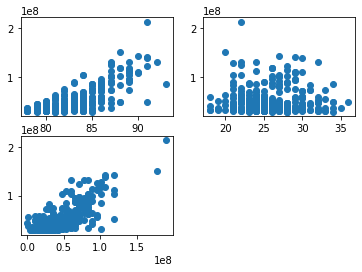

In [276]:
plt.subplot(2,2,1)
plt.scatter(use.fifa_rating, use.fifa_value_usd)
plt.subplot(2,2,2)
plt.scatter(use.age, use.fifa_value_usd)
plt.subplot(2,2,3)
plt.scatter(use.real_life_value_usd, use.fifa_value_usd)

3d Visualizations- all variable pairings shown and identifiable with in line documentation

In [277]:
from mpl_toolkits.mplot3d import Axes3D

In [278]:
j1 = use.fifa_rating
j2 = use.age
j3 = use.real_life_value_usd
k = use.fifa_value_usd

Text(0.5, 0, 'FIFA22 Price')

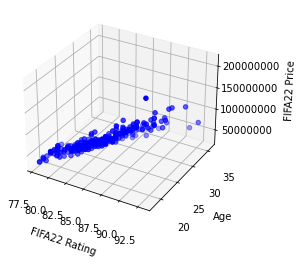

In [279]:
#FIFA22 Rating X Age
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(j1, j2, k, c = "blue", marker = "o")
ax.ticklabel_format(useOffset=False, style='plain')
ax.tick_params(axis='both', which='major', pad=12)
ax.set_xlabel('FIFA22 Rating', labelpad=15)
ax.set_ylabel('Age', labelpad=15)
ax.set_zlabel('FIFA22 Price', labelpad=25)
#ax.view_init(elevation angle in degrees, lateral angle in degrees)

Text(0.5, 0, 'FIFA22 Price')

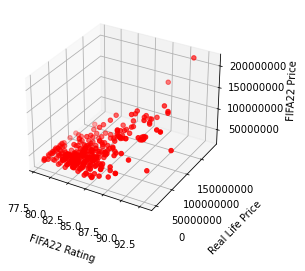

In [280]:
#FIFA22 Rating X Real Life Price
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(j1, j3, k, c = "red", marker = "o")
ax.ticklabel_format(useOffset=False, style='plain')
ax.tick_params(axis='both', which='major', pad=15)
ax.set_xlabel('FIFA22 Rating', labelpad=20)
ax.set_ylabel('Real Life Price', labelpad=25)
ax.set_zlabel('FIFA22 Price', labelpad=25)
#ax.view_init(elevation angle in degrees, lateral angle in degrees)

Text(0.5, 0, 'FIFA22 Price')

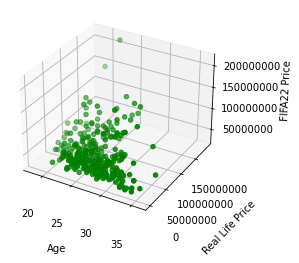

In [281]:
#Age X Real Life Price
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(j2, j3, k, c = "green", marker = "o")
ax.ticklabel_format(useOffset=False, style='plain')
ax.tick_params(axis='both', which='major', pad=15)
ax.set_xlabel('Age', labelpad=20)
ax.set_ylabel('Real Life Price', labelpad=25)
ax.set_zlabel('FIFA22 Price', labelpad=25)
#ax.view_init(elevation angle in degrees, lateral angle in degrees)

***The code will be published to my GitHub and remain open source! To change the viewing angle just change the commented line on each plot.***